In [1]:
import sys
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append("..")
from src.utils.plotting import plot_traj
from src.utils.config import SEEDS, L2_REG

In [2]:
import matplotlib as mpl

mpl.rcParams['lines.linewidth'] = 4
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams["axes.labelsize"] = 34
mpl.rcParams['legend.fontsize'] = 20
mpl.rcParams['axes.titlesize'] = 32
mpl.rcParams['text.usetex'] = True

In [3]:
seeds = SEEDS
l2_reg = L2_REG

In [4]:
plot_cfgs = [
    {
        "optimizer": "sgd",
        "label": "SGD",
        "color": "black",
        "linestyle": "solid",
        "marker": "o",
    },
    {
        "optimizer": "srda",
        "label": "SRDA",
        "color": "tab:blue",
        "linestyle": "solid",
        "marker": "+",
    },
    {
        "optimizer": "lsvrg",
        "label": "LSVRG (Non-Uniform)",
        "color": "tab:red",
        "linestyle": "solid",
        "marker": "s",
    },
    {
        "optimizer": "lsvrg_uniform",
        "label": "LSVRG (Uniform)",
        "color": "purple",
        "linestyle": "solid",
        "marker": "^",
    },
]

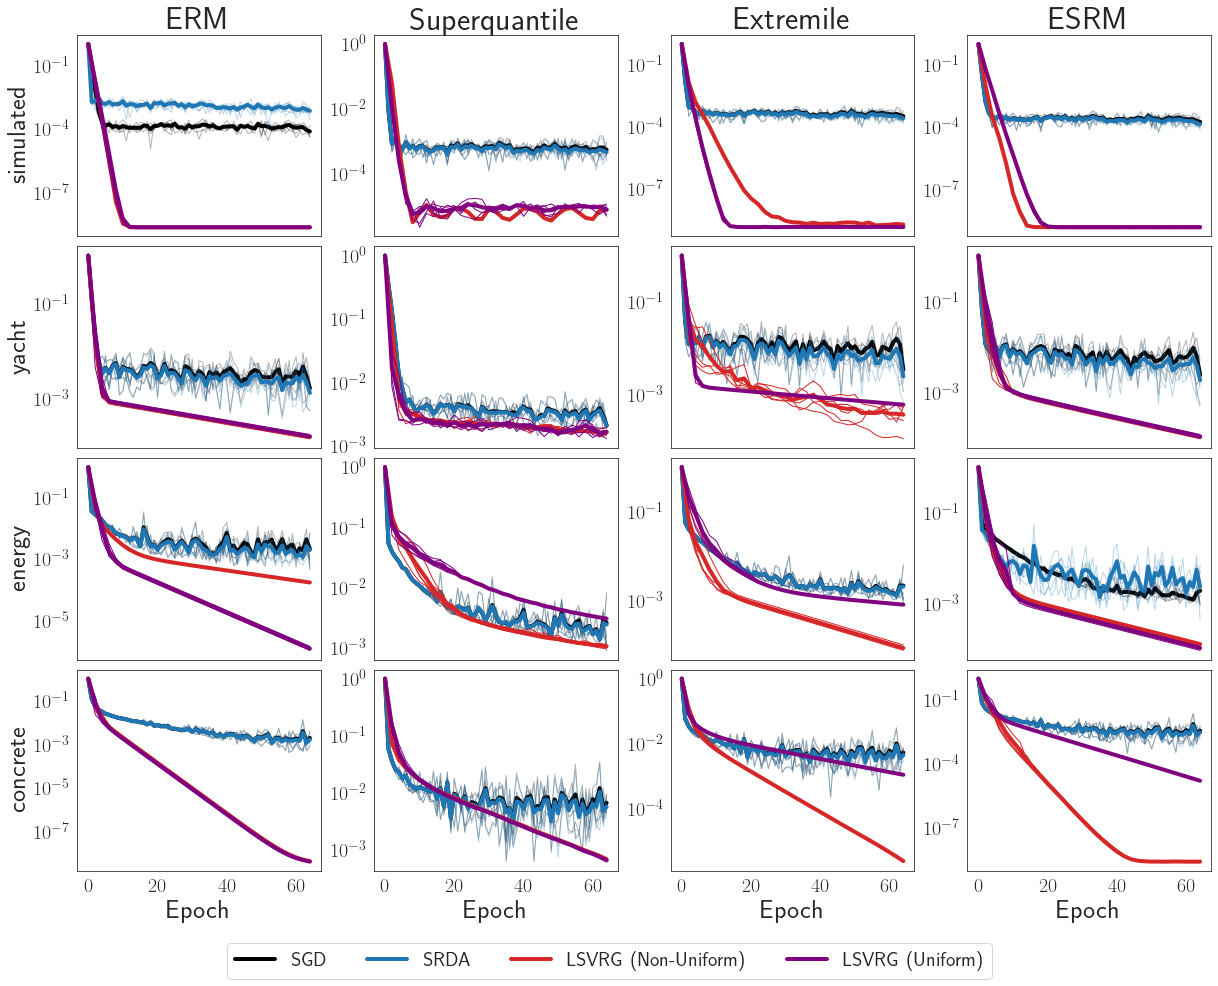

In [5]:
# "Medium" risk parameters.

sns.set_style("white")

fig, axes = plt.subplots(4, 4, figsize=(17, 13))

datasets = ["simulated", "yacht", "energy", "concrete"]
objectives = ["erm", "superquantile", "extremile", "esrm"]
display_risk_params = False

for i, dataset in enumerate(datasets):
    for j, objective in enumerate(objectives):
        model_cfg = {"objective": objective, "l2_reg": l2_reg, "loss": "squared_error", "n_class": None}
        for plot_cfg in plot_cfgs:
            plot_traj(axes[i, j], dataset, model_cfg, plot_cfg, seeds, plot_all=True)
        if i != 3:
            axes[i, j].set_xticks([])
        axes[i, j].set_yscale("log")

axes[0, 0].set_title("ERM")
if display_risk_params:
    axes[0, 1].set_title("0.5-Superquantile")
    axes[0, 2].set_title("2-Extremile")
    axes[0, 3].set_title("1-ESRM")
else:
    axes[0, 1].set_title("Superquantile")
    axes[0, 2].set_title("Extremile")
    axes[0, 3].set_title("ESRM")

axes[3, 0].set_xlabel("Epoch", fontsize=26)
axes[3, 1].set_xlabel("Epoch", fontsize=26)
axes[3, 2].set_xlabel("Epoch", fontsize=26)
axes[3, 3].set_xlabel("Epoch", fontsize=26)

axes[0, 0].set_ylabel("simulated", fontsize=26)
axes[1, 0].set_ylabel("yacht", fontsize=26)
axes[2, 0].set_ylabel("energy", fontsize=26)
axes[3, 0].set_ylabel("concrete", fontsize=26)

handles, labels = axes[2, 2].get_legend_handles_labels()
if plot_cfgs[2]["optimizer"] == "osaga":
    fig.legend(handles=handles, labels=labels, loc='center',
            bbox_to_anchor=(0.5, -0.03), ncol=3)
    fig.tight_layout(pad=1.0)
    plt.savefig("../figures/training_curves_lsaga.pdf", bbox_inches="tight")
else:
    fig.legend(handles=handles, labels=labels, loc='center',
            bbox_to_anchor=(0.5, -0.03), ncol=4)
    fig.tight_layout(pad=1.0)
    if display_risk_params:
        plt.savefig(f"../figures/training_curves_{l2_reg}.pdf", bbox_inches="tight")
    else:
        plt.savefig(f"../figures/training_curves_{l2_reg}_no_risk_params.pdf", bbox_inches="tight")
plt.show()

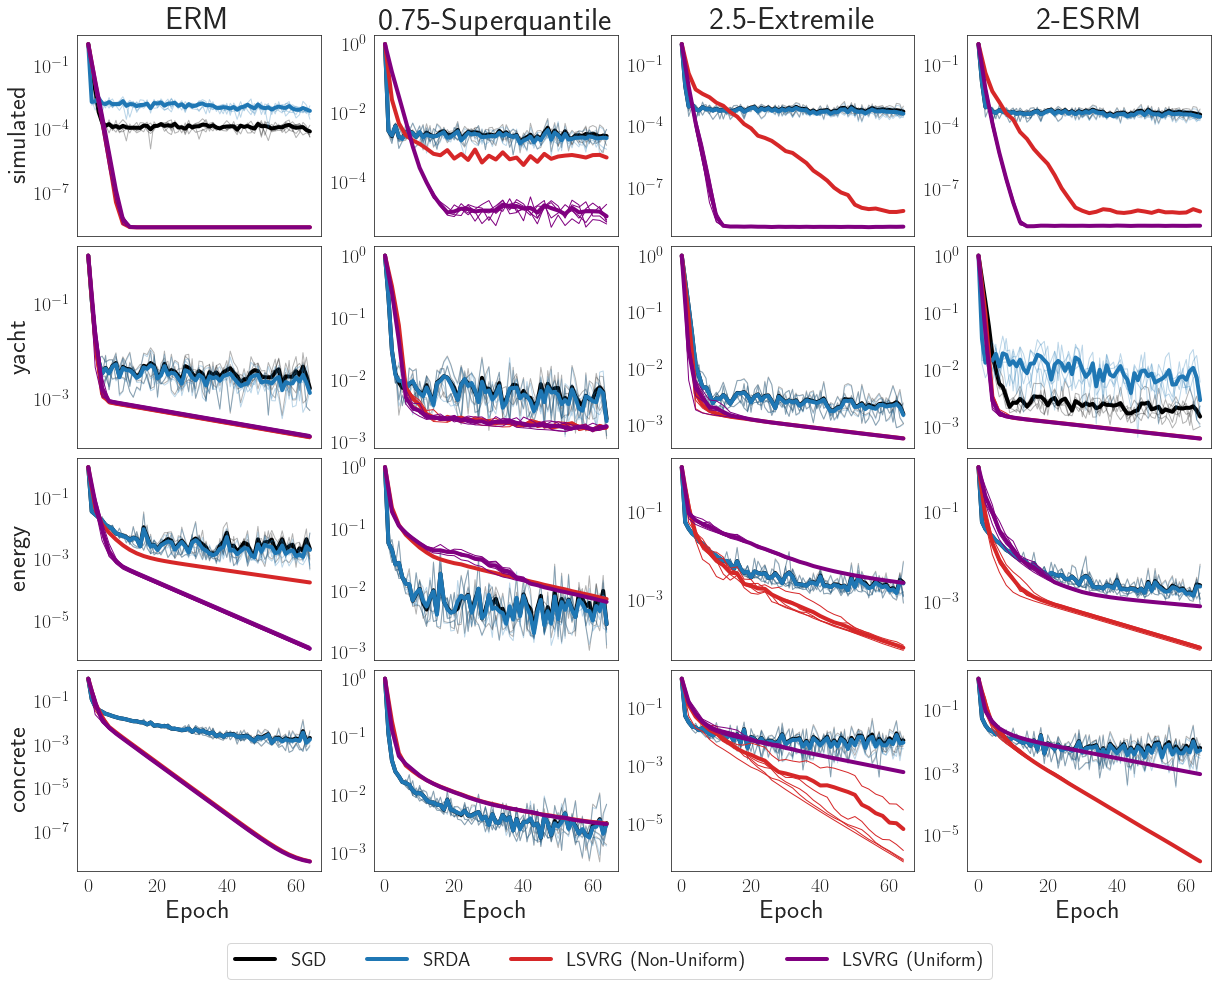

In [6]:
# "Hard" risk parameters.

sns.set_style("white")

fig, axes = plt.subplots(4, 4, figsize=(17, 13))

datasets = ["simulated", "yacht", "energy", "concrete"]
objectives = ["erm", "superquantile_hard", "extremile_hard", "esrm_hard"]

for i, dataset in enumerate(datasets):
    for j, objective in enumerate(objectives):
        model_cfg = {"objective": objective, "l2_reg": l2_reg, "loss": "squared_error", "n_class": None}
        for plot_cfg in plot_cfgs:
            if not(objective == "erm" and plot_cfg["optimizer"] == "osvrg") and not(objective == "erm" and plot_cfg["optimizer"] == "osaga_uniform"):
                plot_traj(axes[i, j], dataset, model_cfg, plot_cfg, seeds, plot_all=True)
        if i != 3:
            axes[i, j].set_xticks([])
        axes[i, j].set_yscale("log")

axes[0, 0].set_title("ERM")
axes[0, 1].set_title("0.75-Superquantile")
axes[0, 2].set_title("2.5-Extremile")
axes[0, 3].set_title("2-ESRM")

axes[3, 0].set_xlabel("Epoch", fontsize=26)
axes[3, 1].set_xlabel("Epoch", fontsize=26)
axes[3, 2].set_xlabel("Epoch", fontsize=26)
axes[3, 3].set_xlabel("Epoch", fontsize=26)

axes[0, 0].set_ylabel("simulated", fontsize=26)
axes[1, 0].set_ylabel("yacht", fontsize=26)
axes[2, 0].set_ylabel("energy", fontsize=26)
axes[3, 0].set_ylabel("concrete", fontsize=26)

handles, labels = axes[2, 2].get_legend_handles_labels()
if plot_cfgs[2]["optimizer"] == "osaga":
    fig.legend(handles=handles, labels=labels, loc='center',
            bbox_to_anchor=(0.5, -0.03), ncol=3)
    fig.tight_layout(pad=1.0)
    plt.savefig("../figures/training_curves_lsaga.pdf", bbox_inches="tight")
else:
    fig.legend(handles=handles, labels=labels, loc='center',
            bbox_to_anchor=(0.5, -0.03), ncol=4)
    fig.tight_layout(pad=1.0)
    plt.savefig(f"../figures/training_curves_{l2_reg}_hard.pdf", bbox_inches="tight")
plt.show()

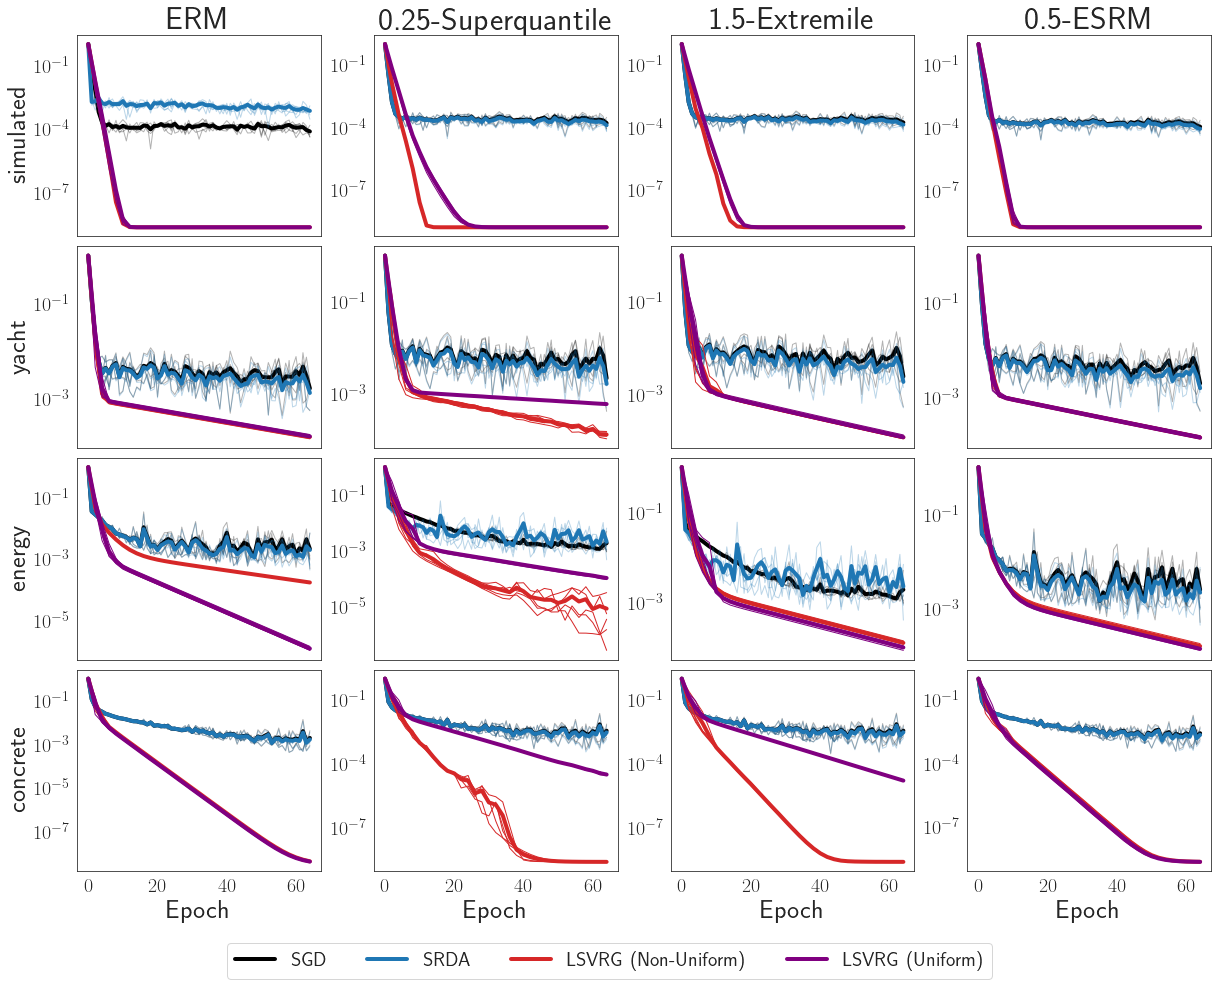

In [7]:
# "Easy" risk parameters.

sns.set_style("white")

fig, axes = plt.subplots(4, 4, figsize=(17, 13))

datasets = ["simulated", "yacht", "energy", "concrete"]
objectives = ["erm", "superquantile_lite", "extremile_lite", "esrm_lite"]

for i, dataset in enumerate(datasets):
    for j, objective in enumerate(objectives):
        model_cfg = {"objective": objective, "l2_reg": l2_reg, "loss": "squared_error", "n_class": None}
        for plot_cfg in plot_cfgs:
            if not(objective == "erm" and plot_cfg["optimizer"] == "osvrg") and not(objective == "erm" and plot_cfg["optimizer"] == "osaga_uniform"):
                plot_traj(axes[i, j], dataset, model_cfg, plot_cfg, seeds, plot_all=True)
        if i != 3:
            axes[i, j].set_xticks([])
        axes[i, j].set_yscale("log")

axes[0, 0].set_title("ERM")
axes[0, 1].set_title("0.25-Superquantile")
axes[0, 2].set_title("1.5-Extremile")
axes[0, 3].set_title("0.5-ESRM")

axes[3, 0].set_xlabel("Epoch", fontsize=26)
axes[3, 1].set_xlabel("Epoch", fontsize=26)
axes[3, 2].set_xlabel("Epoch", fontsize=26)
axes[3, 3].set_xlabel("Epoch", fontsize=26)

axes[0, 0].set_ylabel("simulated", fontsize=26)
axes[1, 0].set_ylabel("yacht", fontsize=26)
axes[2, 0].set_ylabel("energy", fontsize=26)
axes[3, 0].set_ylabel("concrete", fontsize=26)

handles, labels = axes[2, 2].get_legend_handles_labels()
if plot_cfgs[2]["optimizer"] == "osaga":
    fig.legend(handles=handles, labels=labels, loc='center',
            bbox_to_anchor=(0.5, -0.03), ncol=3)
    fig.tight_layout(pad=1.0)
    plt.savefig("../figures/training_curves_lsaga.pdf", bbox_inches="tight")
else:
    fig.legend(handles=handles, labels=labels, loc='center',
            bbox_to_anchor=(0.5, -0.03), ncol=4)
    fig.tight_layout(pad=1.0)
    plt.savefig(f"../figures/training_curves_{l2_reg}_easy.pdf", bbox_inches="tight")
plt.show()

In [8]:
plot_cfgs = [
    {
        "optimizer": "lsvrg_uniform",
        "label": "LSVRG",
        "color": "tab:purple",
        "linestyle": "solid",
    },
    # Comment below for q* = 1 / n.
    {
        "optimizer": "slsvrg_l2",
        "label": r"LSVRG smoothed Square Eucl.",
        "color": "tab:red",
        "linestyle": "solid"
    },
    {
        "optimizer": "slsvrg_neg_ent",
        "label": r"LSVRG smoothed Neg. Entrop.",
        "color": "tab:blue",
        "linestyle": "solid"
    },
    # Comment below for q* = 0.
    {
        "optimizer": "slsvrg_l2_rnd_check",
        "label": r"LSVRG smoothed Square Eucl. (checks)",
        "color": "tab:red",
        "linestyle": "dotted"
    },
    {
        "optimizer": "slsvrg_neg_ent_rnd_check",
        "label": r"LSVRG smoothed Neg. Entrop. (checks)",
        "color": "tab:blue",
        "linestyle": "dotted"
    },
]

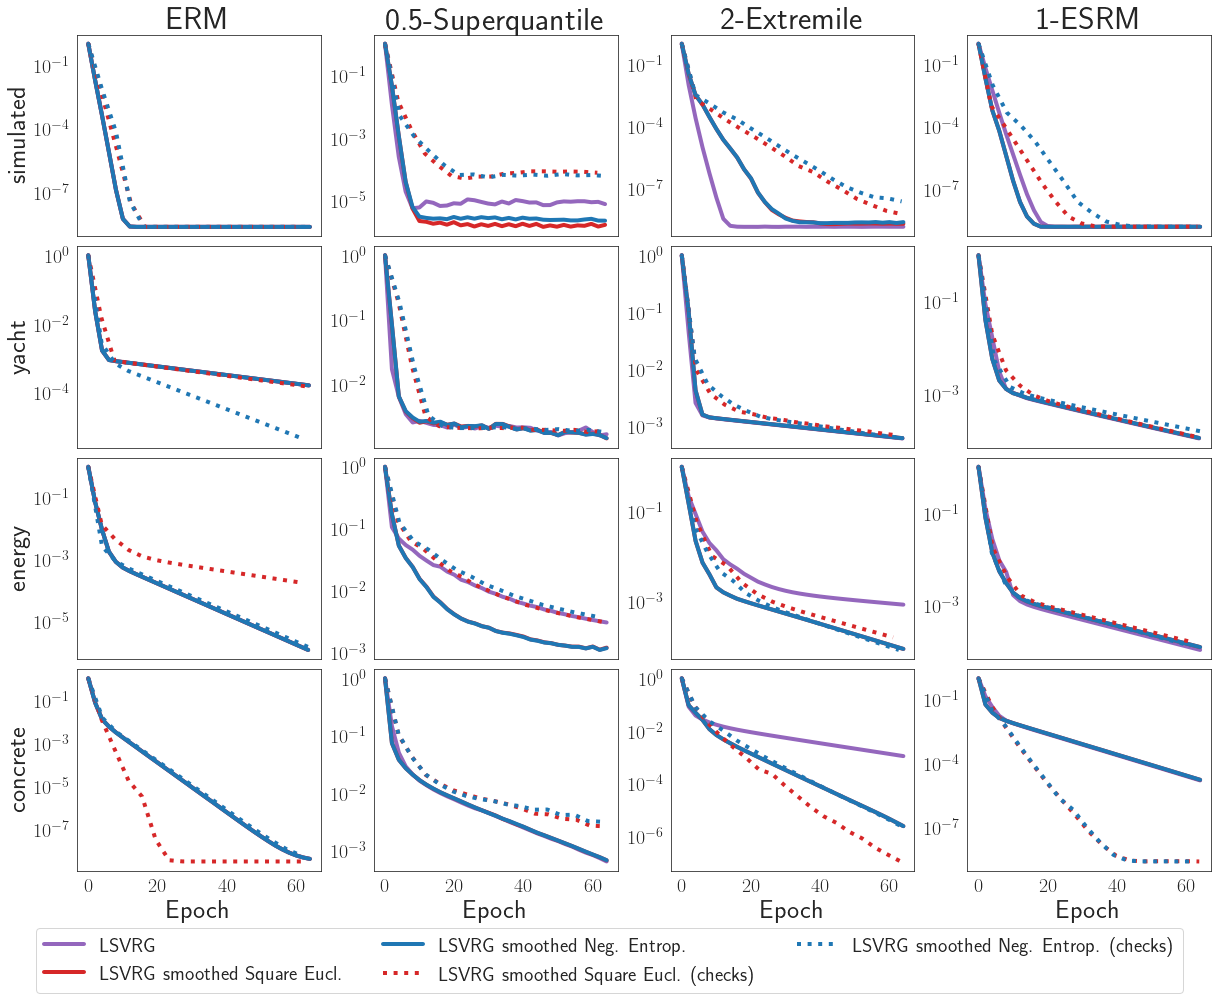

In [9]:
# # "Medium" risk parameters for smoothed optimizers.

sns.set_style("white")

fig, axes = plt.subplots(4, 4, figsize=(17, 13))

datasets = ["simulated", "yacht", "energy", "concrete"]
objectives = ["erm", "superquantile", "extremile", "esrm"]

for i, dataset in enumerate(datasets):
    for j, objective in enumerate(objectives):
        model_cfg = {"objective": objective, "l2_reg": l2_reg, "loss": "squared_error", "n_class": None}
        for plot_cfg in plot_cfgs:
            if not(objective == "erm" and plot_cfg["optimizer"] == "osvrg") and not(objective == "erm" and plot_cfg["optimizer"] == "osaga_uniform"):
                plot_traj(axes[i, j], dataset, model_cfg, plot_cfg, seeds, plot_all=False)
        if i != 3:
            axes[i, j].set_xticks([])
        axes[i, j].set_yscale("log")

axes[0, 0].set_title("ERM")
axes[0, 1].set_title("0.5-Superquantile")
axes[0, 2].set_title("2-Extremile")
axes[0, 3].set_title("1-ESRM")

axes[3, 0].set_xlabel("Epoch", fontsize=26)
axes[3, 1].set_xlabel("Epoch", fontsize=26)
axes[3, 2].set_xlabel("Epoch", fontsize=26)
axes[3, 3].set_xlabel("Epoch", fontsize=26)

axes[0, 0].set_ylabel("simulated", fontsize=26)
axes[1, 0].set_ylabel("yacht", fontsize=26)
axes[2, 0].set_ylabel("energy", fontsize=26)
axes[3, 0].set_ylabel("concrete", fontsize=26)

handles, labels = axes[2, 2].get_legend_handles_labels()
fig.legend(handles=handles, labels=labels, loc='center',
        bbox_to_anchor=(0.5, -0.03), ncol=3)
fig.tight_layout(pad=1.0)
plt.savefig(f"../figures/training_curves_{l2_reg}_smoothed.pdf", bbox_inches="tight")
plt.show()